In [1]:
import sys, os, pandas
import uproot
import numpy as np
# import HDFStore
import matplotlib.pyplot as plt

In [2]:
#filename = "/scratch/mmarcheg/lumi_data/Run305059.root"
filename2 = "/scratch/mmarcheg/lumi_data/Run305064.root"
#plot_dir = "../ntuplesPixel/plots/" + (filename.split("/")[-1]).split(".")[-2] + "/"
#os.mkdir(plot_dir)
#print("Opening %s" % filename)
#file = uproot.open(filename)
print("Opening %s" % filename2)
file2 = uproot.open(filename2)

Opening /scratch/mmarcheg/lumi_data/Run305064.root


In [3]:
#tree = file[b'a/tree;1']
#print(str(tree.name) + " contains " + str(len(tree)) + " entries")
tree2 = file2[b'a/tree;1']
print(str(tree2.name) + " contains " + str(len(tree2)) + " entries")

b'tree' contains 533251558 entries


In [13]:
entrystop = 53605236
read_entries = 0
#df_list = []
instaLumi = np.array([])
N = len(tree2)
df_grid =tree2.pandas.df([b'ladder', b'pos_x', b'pos_y', b'size', b'cols', b'rows', b'global_eta', b'global_phi', b'instaLumi', b'bx', b'tres'], entrystop=entrystop)

In [15]:
import bx_index as bi
df_grid['ti'] = df_grid['bx'].apply(bi.ti.get)
for i in range(9):
    df_grid_selected = df_grid.query('ti == ' + str(i))
    print("ti = %d\tN=%d" % (i, df_grid_selected.shape[0]))

ti = 0	N=2160217
ti = 1	N=13513271
ti = 2	N=3980887
ti = 3	N=4038422
ti = 4	N=4293651
ti = 5	N=4671497
ti = 6	N=4684269
ti = 7	N=4571727
ti = 8	N=11607979


In [17]:
df_grid_selected = df_grid.query('ti == 0')
df_grid_selected.head()

,ladder,pos_x,pos_y,size,cols,rows,global_eta,global_phi,instaLumi,bx,tres,ti
6408,3,412,65,1,1,1,-2.552218,0.295031,9240.4,834,129702,0
6409,3,374,114,1,1,1,-2.514541,0.134314,9240.4,834,129702,0
6410,3,348,109,1,1,1,-2.495386,0.149205,9240.4,834,129702,0
6411,3,190,4,1,1,1,-2.348001,0.480021,9240.4,834,129702,0
6412,3,20,79,1,1,1,-2.202473,0.242300,9240.4,834,129702,0


In [ ]:
filename = "combined2017.csv"
df_grid.to_csv(filename, index=False)

In [23]:
instaLumi = tree[b'instaLumi'].array()

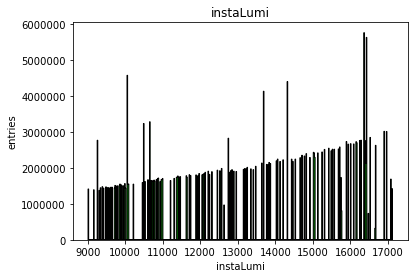

In [39]:
nbins = 500
plt.hist(instaLumi, bins=nbins, facecolor='green', ec='black', histtype='stepfilled')
plt.xlabel('instaLumi')
plt.ylabel('entries')
plt.title('instaLumi')
plt.show()

In [36]:
nbins=10
lumi_bins = np.quantile(instaLumi, np.linspace(0, 1, nbins+1))
print(lumi_bins)

[ 9010.   9887.6 10683.  11441.6 12306.2 13256.7 14133.6 15011.4 15746.8
 16369.7 17117. ]


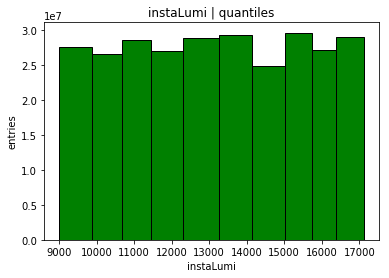

In [38]:
plt.hist(instaLumi, bins=lumi_bins, facecolor='green', ec='black')
plt.xlabel('instaLumi')
plt.ylabel('entries')
plt.title('instaLumi | quantiles')
plt.show()

In [44]:
print(lumi_bins)
lumi_bins[6] = 14133.6
lumi_bins[7] = 15012
print(lumi_bins)

[ 9010.   9887.6 10683.  11441.6 12306.2 13256.7 14133.7 15011.4 15746.8
 16369.7 17117. ]
[ 9010.   9887.6 10683.  11441.6 12306.2 13256.7 14133.6 15012.  15746.8
 16369.7 17117. ]


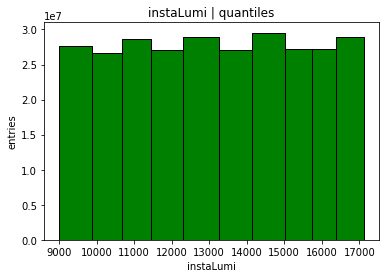

In [45]:
plt.hist(instaLumi, bins=lumi_bins, facecolor='green', ec='black')
plt.xlabel('instaLumi')
plt.ylabel('entries')
plt.title('instaLumi | quantiles')
plt.show()

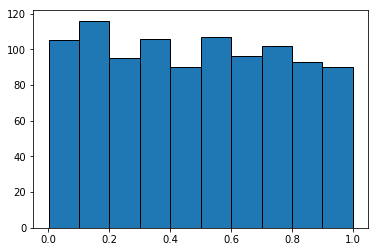

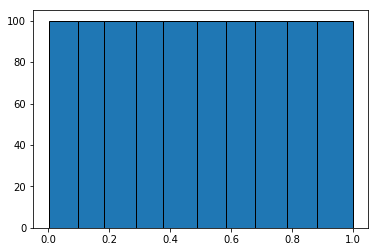

In [48]:
x = np.random.rand(1000)
x_bins = np.quantile(x, np.linspace(0, 1, 11))
plt.hist(x, ec="black")
plt.show()
plt.hist(x, bins=x_bins, ec="black")
plt.show()